In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv('/content/House Price India.csv.zip')
#printing first 5 records of the dataset
print(dataset.head(5))

           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [2]:
dataset.shape

(14620, 23)

In [5]:
#Data processing
obj=(dataset.dtypes=='object')
obj_cols=list(obj[obj].index)
print("Categorical Variables:",len(obj_cols))
int=(dataset.dtypes=='int')
num_cols=list(int[int].index)
print("Numerical Variables:",len(num_cols))
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical Variables: 0
Numerical Variables: 19
Float variables: 4


<Axes: >

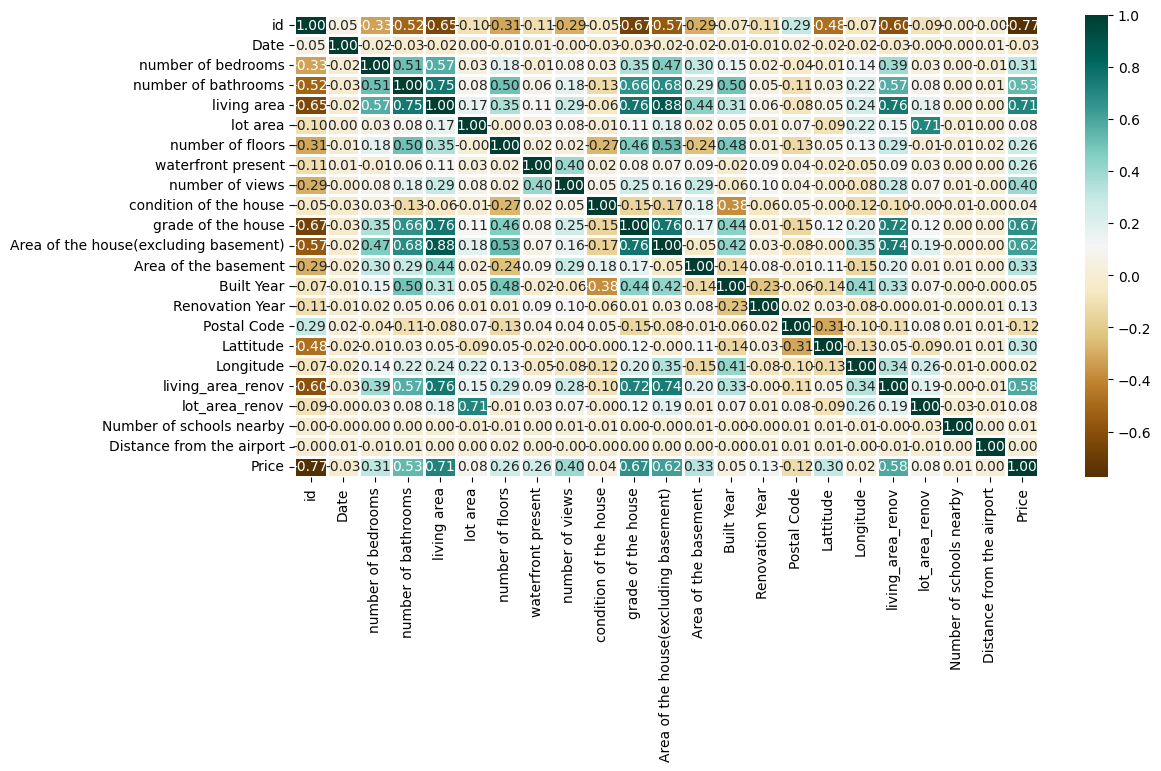

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [13]:
#data cleaning
dataset.drop(['id'],
             axis=1,
             inplace=True)

In [16]:
#Replacing SalePrice empty values with their mean values to make the data distribution symmetric.
dataset['Price'] = dataset['Price'].fillna(
  dataset['Price'].mean())

In [18]:
#Drop records with null values (as the empty records are very less).

new_dataset = dataset.dropna()
new_dataset

,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,42491,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,42491,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,42491,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,42491,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,42491,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,42734,2,1.50,1556,20000,1.0,0,0,4,7,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,42734,3,2.00,1680,7000,1.5,0,0,4,7,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,42734,2,1.00,1070,6120,1.0,0,0,3,6,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,42734,4,1.00,1030,6621,1.0,0,0,4,6,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [20]:
#Checking features which have null values in the new dataframe (if there are still any).

new_dataset.isnull().sum()

Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64